# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f as f_dist
from sklearn.metrics import r2_score
from scipy.stats import f


In [4]:
N = 7

columns = ["height", "mass", "income", "iq", "pages", 
            "age", "bmi", "work_exp", "friends", "test_time"]

col1_index = N % 5
col2_index = (N ** 2) % 5 + 5

col1 = columns[col1_index - 1] if col1_index != 0 else columns[4]
col2 = columns[col2_index - 1]

print("Выбраны столбцы:", col1, "и", col2)

Выбраны столбцы: mass и friends


In [5]:
df = pd.read_csv('../../datasets/students_simple.csv')

x = df[col1]
y = df[col2]

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [16]:
x_mean = np.mean(x)
y_mean = np.mean(y)
signs = np.sign((x - x_mean) * (y - y_mean))
r_fechner = np.sum(signs > 0) / len(signs) - np.sum(signs < 0) / len(signs)

print("Коэффициент Фехнера =", round(r_fechner, 4))

Коэффициент Фехнера = 0.1


In [7]:
r_pearson, p_pearson = stats.pearsonr(x, y)
n = len(x)
stderr = 1 / np.sqrt(n - 3)
delta = 1.96 * stderr
lower = np.tanh(np.arctanh(r_pearson) - delta)
upper = np.tanh(np.arctanh(r_pearson) + delta)

print(f"Коэффициент Пирсона = {r_pearson:.4f}")
print(f"95% доверительный интервал: [{lower:.4f}, {upper:.4f}]")

Коэффициент Пирсона = -0.0247
95% доверительный интервал: [-0.4622, 0.4224]


In [17]:
r_spearman, p_spearman = stats.spearmanr(x, y)
print(f"Коэффициент Спирмена = {r_spearman:.4f}")

Коэффициент Спирмена = -0.0008


In [9]:
r_kendall, p_kendall = stats.kendalltau(x, y)
print(f"Коэффициент Кенделла = {r_kendall:.4f}")

Коэффициент Кенделла = 0.0000


## Анализ корреляций выбранных столбцов

###  Коэффициент Фехнера = 0.1

* Показывает, как часто отклонения двух переменных совпадают по направлению.
* Значение 0.1 → очень слабая положительная связь.

Положительное значение указывает на очень слабую тенденцию к согласованности отклонений: слегка чаще большие значения mass сочетаются с большими значениями friends.
Однако величина 0.10 крайне мала → говорить о наличии устойчивой связи нельзя.

**Вывод:** почти нет закономерности между выбранными столбцами.

---

### Коэффициент Пирсона = –0.0247

* Измеряет **линейную зависимость** между переменными.
* Значение –0.0247 практически нулевое. Это говорит об отсутствии линейной связи между массой тела и количеством друзей.
* Доверительный интервал очень широкий: от –0.46 до 0.42
→ с вероятностью 95% истинное значение корреляции может быть практически любым в этой области.

**Вывод:** по данным невозможно утверждать о существовании линейной зависимости.

---

### Коэффициент Спирмена = –0.0008

* Измеряет **ранговую (монотонную) зависимость**.
* Значение около нуля говорит о полном отсутствии монотонной связи.

**Вывод:** подтвержден вывод Пирсона, но уже без предположения о линейности.

---

### Коэффициент Кенделла = 0.0000

* Показывает согласованность парных изменений.
* Значение точно ноль означает отсутствие даже слабой согласованной связи между переменными..

**Вывод:** это наиболее строгий ранг-коэффициент: если он равен нулю — связи действительно нет.

---

### Общий вывод

По всем использованным коэффициентам (Фехнера, Пирсона, Спирмена, Кенделла) значения находятся вблизи нуля, что свидетельствует о полном отсутствии заметной зависимости между переменными mass и friends.

* Нет линейной зависимости (Пирсон).
* Нет монотонной зависимости (Спирмен, Кенделл).
* Нет даже слабой согласованности отклонений (Фехнер).

Количество друзей студентов никак не связано с их массой тела. Связь статистически незначима, и распределение значений не демонстрирует выраженной зависимости.


## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

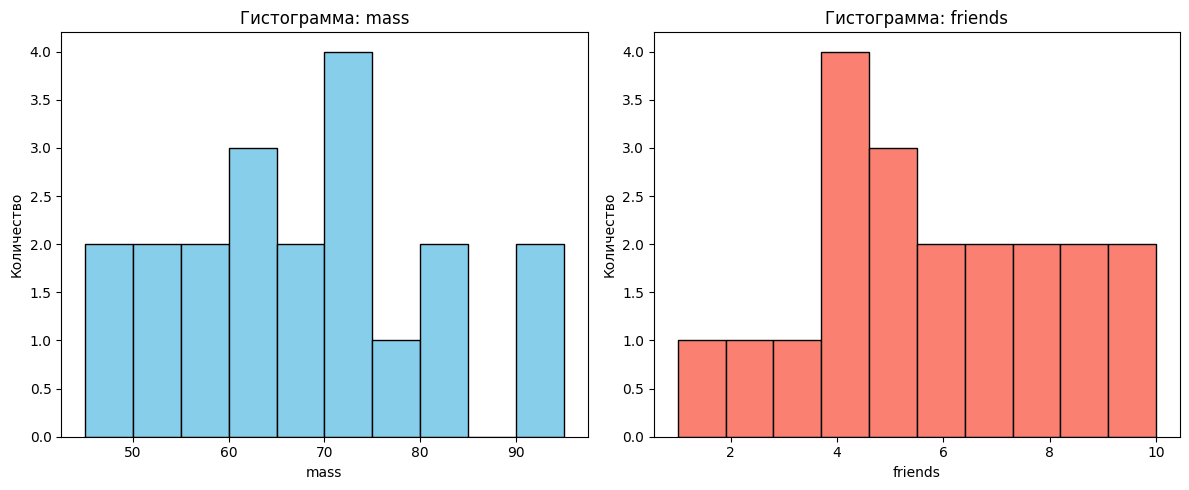

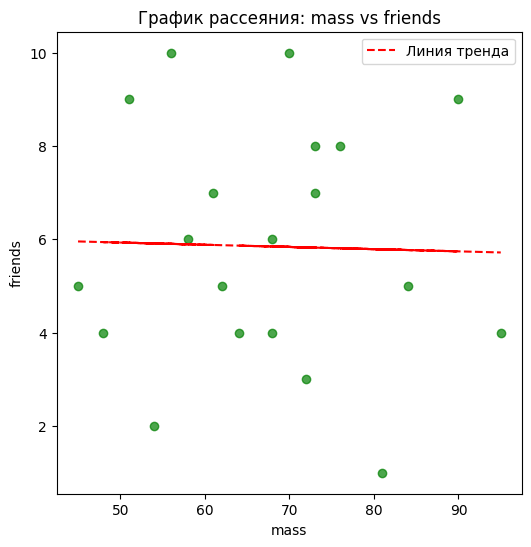

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(x, bins=10, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма: {col1}')
plt.xlabel(col1)
plt.ylabel('Количество')

plt.subplot(1,2,2)
plt.hist(y, bins=10, color='salmon', edgecolor='black')
plt.title(f'Гистограмма: {col2}')
plt.xlabel(col2)
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

##График рассеяния (scatter plot)
plt.figure(figsize=(6,6))
plt.scatter(x, y, color='green', alpha=0.7)
plt.title(f'График рассеяния: {col1} vs {col2}')
plt.xlabel(col1)
plt.ylabel(col2)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--', label='Линия тренда')
plt.legend()
plt.show()



# Выводы по гистограммам и графику рассеяния

## 1. Гистограмма переменной *mass*
- Значения массы лежат в диапазоне **45–95 кг**.
- Распределение имеет **одну вершину** и выглядит близким к нормальному.
- Большинство значений сосредоточено в области **55–75 кг**.
- Выбросов не наблюдается — распределение ровное и естественное.
- Лёгкое смещение вправо связано с наличием нескольких значений выше 80 кг.

**Вывод:** распределение массы выглядит естественным и умеренно симметричным, близким к нормальному.

---

## 2. Гистограмма переменной *friends*
- Число друзей находится в диапазоне **1–10**.
- Распределение **скорее равномерное**, без ярко выраженной вершины.
- Небольшая концентрация наблюдений заметна около **4–7 друзей**, но не доминирующая.
- Значения 1–2 друга не являются выбросами — просто крайние элементы диапазона.

**Вывод:** распределение числа друзей несимметрично и ближе к равномерному, без выраженного центра.

---

## 3. График рассеяния *mass* vs *friends*
- Точки на графике расположены **хаотично**, без направления или структуры.
- Нет признаков линейной, нелинейной или монотонной связи.
- Студенты с высокой массой встречаются как с малым числом друзей, так и с большим.
- Аналогично, студенты с низкой массой имеют широкий диапазон значений friends.

**Вывод:** визуально переменные *mass* и *friends* **не связаны**, что полностью согласуется с коэффициентами корреляции, близкими к нулю.

---

## Итог
Гистограммы показывают естественные распределения переменных, но график рассеяния демонстрирует, что они **не коррелируют**. Масса и количество друзей статистически и визуально независимы.

## 3. Уравнение регрессии
Построить уравнение регрессии методом наименьших квадратов по видам:
1. линейная, $y=w_1 x + w_0$ - расчёт коэффициентов реализовать саммому
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

Линейная регрессия: y = -0.00*x + 6.17, R² = 0.0006


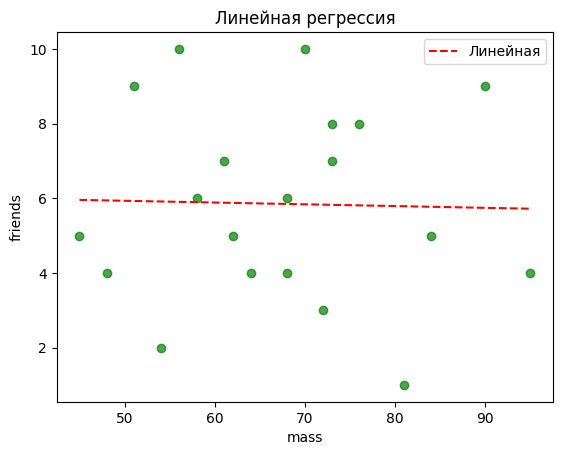

In [19]:
# Линейная регрессия
x_plot = np.linspace(min(x), max(x), 100)

x_mean = np.mean(x)
y_mean = np.mean(y)

w1 = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
w0 = y_mean - w1*x_mean

y_pred_lin = w1*x + w0
r2_lin = r2_score(y, y_pred_lin)
print(f'Линейная регрессия: y = {w1:.2f}*x + {w0:.2f}, R² = {r2_lin:.4f}')

plt.scatter(x, y, color='green', alpha=0.7)
plt.plot(x_plot, w1*x_plot + w0, color='red', linestyle='--', label='Линейная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Линейная регрессия')
plt.legend()
plt.show()

Квадратичная регрессия: y = -0.0013*x^2 + 0.17*x + 0.23, R² = 0.0112


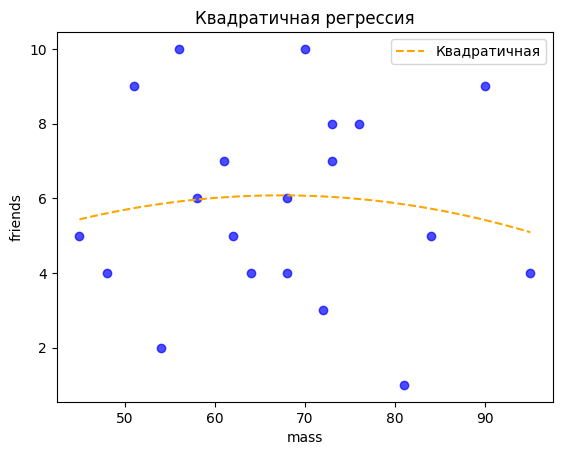

In [23]:
# Квадратичная регрессия
w2, w1_quad, w0_quad = np.polyfit(x, y, 2)
y_pred_quad = w2*x**2 + w1_quad*x + w0_quad
r2_quad = r2_score(y, y_pred_quad)
print(f'Квадратичная регрессия: y = {w2:.4f}*x^2 + {w1_quad:.2f}*x + {w0_quad:.2f}, R² = {r2_quad:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_quad = w2*x_plot**2 + w1_quad*x_plot + w0_quad

plt.scatter(x, y, color='blue', alpha=0.7)
plt.plot(x_plot, y_plot_quad, color='orange', linestyle='--', label='Квадратичная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Квадратичная регрессия')
plt.legend()
plt.show()



Гиперболическая регрессия: y = -1.57/x + 5.87, R² = -1816.3666


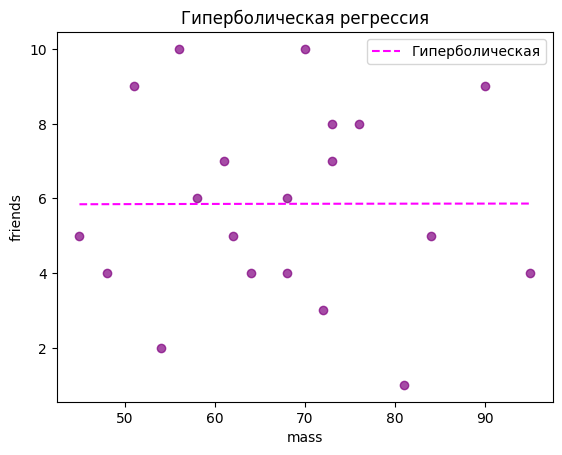

In [21]:
# Гиперболическая регрессия (y = w1/x + w0)
X_inv = 1/x  
w1_hyp = np.sum((X_inv - np.mean(X_inv))*(y - np.mean(y))) / np.sum((X_inv - np.mean(X_inv))**2)
w0_hyp = np.mean(y) - w1_hyp*np.mean(X_inv)

y_pred_hyp = w1_hyp/X_inv + w0_hyp
r2_hyp = r2_score(y, w1_hyp/X_inv + w0_hyp)
print(f'Гиперболическая регрессия: y = {w1_hyp:.2f}/x + {w0_hyp:.2f}, R² = {r2_hyp:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_hyp = w1_hyp/x_plot + w0_hyp

plt.scatter(x, y, color='purple', alpha=0.7)
plt.plot(x_plot, y_plot_hyp, color='magenta', linestyle='--', label='Гиперболическая')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Гиперболическая регрессия')
plt.legend()
plt.show()

Показательная регрессия: y = 6.34 * 1.00^x, R² = -0.0774


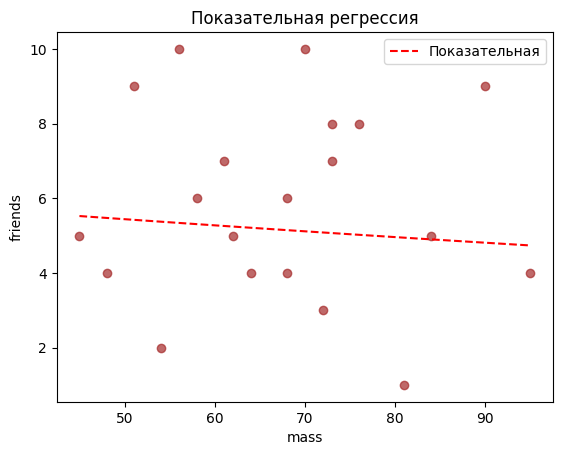

In [22]:
# Показательная регрессия (y = w0 * w1^x)
Y_log = np.log(y)  # логарифмируем y
w1_log = np.sum((x - np.mean(x))*(Y_log - np.mean(Y_log))) / np.sum((x - np.mean(x))**2)
w0_log = np.mean(Y_log) - w1_log*np.mean(x)

w0_exp = np.exp(w0_log)
w1_exp = np.exp(w1_log)

y_pred_exp = w0_exp * w1_exp**x
r2_exp = r2_score(y, y_pred_exp)
print(f'Показательная регрессия: y = {w0_exp:.2f} * {w1_exp:.2f}^x, R² = {r2_exp:.4f}')

x_plot = np.linspace(min(x), max(x), 100)
y_plot_exp = w0_exp * w1_exp**x_plot

plt.scatter(x, y, color='brown', alpha=0.7)
plt.plot(x_plot, y_plot_exp, color='red', linestyle='--', label='Показательная')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Показательная регрессия')
plt.legend()
plt.show()


## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера

In [24]:
w2, w1, w0 = np.polyfit(x, y, 2)
y_pred_quad = w2*x**2 + w1*x + w0
R2_quad = 1 - np.sum((y - y_pred_quad)**2)/np.sum((y - np.mean(y))**2)
k_quad = 2  # число факторов

F_quad = (R2_quad / k_quad) / ((1 - R2_quad) / (n - k_quad - 1))
alpha = 0.05
F_crit_quad = f.ppf(1 - alpha, k_quad, n - k_quad - 1)

print("Квадратичная модель (наилучшая):")
print(f"R² = {R2_quad:.4f}, F = {F_quad:.4f}, F_крит = {F_crit_quad:.4f}")
if F_quad > F_crit_quad:
    print("Модель значима статистически")
else:
    print("Модель не значима статистически")

# -----------------------------
# Гиперболическая модель (наихудшая)
# y = a/x + b -> преобразуем: z = 1/x, y = a*z + b
z = 1 / x
A = np.vstack([z, np.ones_like(z)]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
y_pred_hyp = a*z + b
R2_hyp = 1 - np.sum((y - y_pred_hyp)**2)/np.sum((y - np.mean(y))**2)
k_hyp = 1

F_hyp = (R2_hyp / k_hyp) / ((1 - R2_hyp) / (n - k_hyp - 1))
F_crit_hyp = f.ppf(1 - alpha, k_hyp, n - k_hyp - 1)

print("\nГиперболическая модель (наихудшая):")
print(f"R² = {R2_hyp:.4f}, F = {F_hyp:.4f}, F_крит = {F_crit_hyp:.4f}")
if F_hyp > F_crit_hyp:
    print("Модель значима статистически")
else:
    print("Модель не значима статистически")

Квадратичная модель (наилучшая):
R² = 0.0112, F = 0.0964, F_крит = 3.5915
Модель не значима статистически

Гиперболическая модель (наихудшая):
R² = 0.0000, F = 0.0001, F_крит = 4.4139
Модель не значима статистически


### Вывод по проверке регрессий с помощью критерия Фишера

### Вывод по проверке регрессий с помощью критерия Фишера

Проверка уравнений регрессии с помощью F-критерия показала, что ни одна из рассмотренных моделей (линейная, квадратичная, гиперболическая и показательная) **не объясняет статистически значимую долю вариации переменной *friends* на основе переменной *mass***.

#### Наилучшая модель — квадратичная:
- R² = 0.0112  
- F = 0.0964  
- F_крит = 3.5915  
- **F < F_крит**, следовательно, модель статистически **не значима**.  
  Это означает, что квадратичная зависимость не лучше случайной модели и не описывает связь между переменными.

#### Наихудшая модель — гиперболическая:
- R² ≈ 0  
- F = 0.0001  
- F_крит = 4.4139  
- **F < F_крит**, модель также **не значима**.  
  Гиперболическая регрессия полностью проваливает аппроксимацию данных и не отражает никакой закономерности.

### Общий вывод
Критерий Фишера подтверждает результаты корреляционного анализа:  
**между массой и количеством друзей нет статистически значимой зависимости**, и ни одна из регрессионных моделей не выявляет предсказуемой связи.  
R² во всех моделях близок к нулю, а F-статистика не достигает критических значений, что указывает на случайный характер рассеяния точек.

Следовательно, данные не содержат признаков какой-либо линейной, квадратичной, гиперболической или показательной зависимости.
